In [2]:
import tensorflow as tf
import os
from scipy import ndimage

os.environ['CUDA_VISIBLE_DEVICES']='0'
#device = 'cpu'

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import splinegenerator as sg

# Closed Curve

In [84]:
def wrapIndex(t, k, M, half_support):
    wrappedT = t - k
    t_left = t - half_support
    t_right = t + half_support
    if k < t_left:
        if t_left <= k + M <= t_right:
            wrappedT = t - (k + M)
    elif k > t + half_support:
        if t_left <= k - M <= t_right:
            wrappedT = t - (k - M)
    return wrappedT


M = 6
contourlength = 1000

phi_list = np.zeros((1,contourlength,M))

for i in range(1,contourlength+1):
    contour_size = i

    ts = np.linspace(0, float(M), num=contour_size, endpoint=False)
    wrapped_indices = np.array([[wrapIndex(t, k, M, 2)
                                 for k in range(M)] for t in ts])
    vfunc = np.vectorize(sg.B1().value, otypes = [np.float32])
    phi = vfunc(wrapped_indices)
    phi = np.pad(phi, ((0,contourlength - phi.shape[0]), (0,0)), constant_values=(0))  
    
    phi = np.expand_dims(phi, axis = 0)
    phi_list = np.concatenate((phi_list,phi), axis = 0)    
    
phi_list = tf.convert_to_tensor(phi_list, dtype=tf.float32) 

In [85]:
control_points = tf.convert_to_tensor([[10,10],[30,30],[50,10],[50,50],[30,20],[10,50]], dtype=tf.float32)
phi = phi_list[1000]
SplineContour = sg.SplineCurveVectorized(M,sg.B3(),True,control_points)
contours = (SplineContour.sampleSequential(phi))

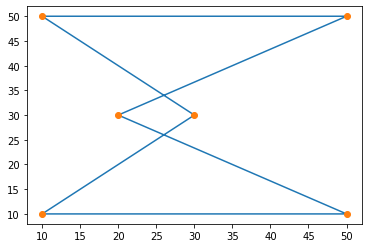

In [86]:
plt.plot(contours[:,1], contours[:,0])
plt.plot(control_points[:,1], control_points[:,0], 'o')

# Open Curve

In [102]:
def wrapIndex(t, k, M, half_support):
    wrappedT = t - k
    t_left = t - half_support
    t_right = t + half_support
    if k < t_left:
        if t_left <= k + M <= t_right:
            wrappedT = t - (k + M)
    elif k > t + half_support:
        if t_left <= k - M <= t_right:
            wrappedT = t - (k - M)
    return wrappedT

M = 6
contourlength = 1000

phi_list = np.zeros((1,contourlength,M))

for i in range(1,contourlength+1):
    contour_size = i

    ts = np.linspace(0, float(M) - 1, num=contour_size, endpoint=False)
    wrapped_indices = np.array([[(t-k)
                                 for k in range(M)] for t in ts])
    vfunc = np.vectorize(sg.B1().value, otypes = [np.float32])
    phi = vfunc(wrapped_indices)
    phi = np.pad(phi, ((0,contourlength - phi.shape[0]), (0,0)), constant_values=(0))  
    
    phi = np.expand_dims(phi, axis = 0)
    phi_list = np.concatenate((phi_list,phi), axis = 0)    
    
phi_list = tf.convert_to_tensor(phi_list, dtype=tf.float32) 

In [103]:
control_points = tf.convert_to_tensor([[10,10],[30,30],[50,10],[50,50],[30,20],[10,50]], dtype=tf.float32)
phi = phi_list[1000]
SplineContour = sg.SplineCurveVectorized(M,sg.B3(),True,control_points)
contours = (SplineContour.sampleSequential(phi))

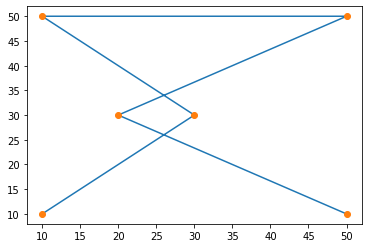

In [104]:
plt.plot(contours[:,1], contours[:,0])
plt.plot(control_points[:,1], control_points[:,0], 'o')